In [1]:
#-*- coding: utf-8 -*-

In [1]:
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame as df

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df = pd.read_csv('C:/Users/chaeyoung/Desktop/경희대학교/공모전/K-water/데이터/하천데이터/river_final_no_na.csv', encoding = 'euc-kr')

# 이상치 제거

In [3]:
river = df

# 결측치 제거
river = river.dropna(axis=0)
np.shape(river)

Q1 = river.quantile(0.25)
Q3 = river.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

river_out = river[~((river.iloc[:,1:] < (Q1 - 1.5 * IQR)) |(river.iloc[:,1:] > (Q3 + 1.5 * IQR))).any(axis=1)]
river_out.shape

temp = river_out

ITEM_TEMP           13.700000
ITEM_PH              0.700000
ITEM_DOC             3.700000
ITEM_BOD             1.807908
ITEM_COD             3.700000
ITEM_TN              1.980000
MEAN_TEMP           15.700000
L_TEMP              16.900000
U_TEMP              15.400000
MAX_MOMENT_WIND      3.300000
MAX_MIN              2.100000
MEAN_WIND            1.100000
M_WIND_100         923.000000
MEAN_DEW            17.500000
L_REHU              26.000000
MEAN_MOIS           21.490324
MEAN_STPR           12.971768
MEAN_hPa            14.900000
U_hPa               12.728525
L_hPa               12.000000
MEAN_PRES           12.200000
MEAN_SUN             3.145956
SUM_SUN              6.300000
MEAN_LAND           18.100000
L_TEMP.1            18.100000
ITEM_SS              7.500000
ITEM_TP              0.063000
dtype: float64


In [4]:
temp.head()

,ITEM_TEMP,ITEM_PH,ITEM_DOC,ITEM_BOD,ITEM_COD,ITEM_TN,MEAN_TEMP,L_TEMP,U_TEMP,MAX_MOMENT_WIND,...,U_hPa,L_hPa,MEAN_PRES,MEAN_SUN,SUM_SUN,MEAN_LAND,L_TEMP.1,ITEM_SS,ITEM_TP,key
0,36.0,6.5,5.4,1.3,6.2,0.893,31.3,26.6,37.9,6.0,...,1006.4,1003.9,1005.3,13.9,12.1,40.6,24.7,10.2,0.025,2018.08.02부안
2,35.8,8.5,10.2,3.0,9.0,0.629,32.0,26.3,37.8,6.1,...,1008.9,1004.8,1006.9,14.2,12.6,40.8,25.2,6.4,0.031,2018.07.24안동
6,35.5,8.7,9.2,3.2,9.8,2.618,32.3,27.2,37.1,5.9,...,1008.1,1004.5,1006.6,14.2,8.6,39.4,26.0,8.2,0.046,2018.07.25대구
7,35.5,8.9,10.7,3.3,7.6,0.382,28.5,21.6,38.2,6.1,...,1011.3,1007.8,1009.7,13.7,10.7,35.8,20.8,9.4,0.023,2016.08.10경주시
10,35.5,9.1,13.7,2.1,5.0,2.621,28.7,24.8,34.0,6.8,...,1012.7,1009.3,1011.2,13.9,0.8,33.2,23.1,4.3,0.169,2015.08.03김해시


# 변수 스케일링

In [5]:
time = temp[['key']]
not_time = temp[['ITEM_TEMP', 'ITEM_PH', 'ITEM_DOC', 'ITEM_BOD', 'ITEM_COD', 'ITEM_TN',
 'MEAN_TEMP', 'L_TEMP', 'U_TEMP', 'MAX_MOMENT_WIND', 'MAX_MIN', 'MEAN_WIND', 'M_WIND_100',
 'MEAN_DEW', 'L_REHU', 'MEAN_MOIS', 'MEAN_STPR', 'MEAN_hPa', 'U_hPa', 'L_hPa', 'MEAN_PRES',
 'MEAN_SUN', 'SUM_SUN', 'MEAN_LAND', 'L_TEMP.1', 'ITEM_SS','ITEM_TP' ]]

In [6]:
not_time.head()

,ITEM_TEMP,ITEM_PH,ITEM_DOC,ITEM_BOD,ITEM_COD,ITEM_TN,MEAN_TEMP,L_TEMP,U_TEMP,MAX_MOMENT_WIND,...,MEAN_hPa,U_hPa,L_hPa,MEAN_PRES,MEAN_SUN,SUM_SUN,MEAN_LAND,L_TEMP.1,ITEM_SS,ITEM_TP
0,36.0,6.5,5.4,1.3,6.2,0.893,31.3,26.6,37.9,6.0,...,1004.0,1006.4,1003.9,1005.3,13.9,12.1,40.6,24.7,10.2,0.025
2,35.8,8.5,10.2,3.0,9.0,0.629,32.0,26.3,37.8,6.1,...,991.4,1008.9,1004.8,1006.9,14.2,12.6,40.8,25.2,6.4,0.031
6,35.5,8.7,9.2,3.2,9.8,2.618,32.3,27.2,37.1,5.9,...,1000.6,1008.1,1004.5,1006.6,14.2,8.6,39.4,26.0,8.2,0.046
7,35.5,8.9,10.7,3.3,7.6,0.382,28.5,21.6,38.2,6.1,...,1005.5,1011.3,1007.8,1009.7,13.7,10.7,35.8,20.8,9.4,0.023
10,35.5,9.1,13.7,2.1,5.0,2.621,28.7,24.8,34.0,6.8,...,1004.5,1012.7,1009.3,1011.2,13.9,0.8,33.2,23.1,4.3,0.169


In [7]:
min_max_scaler = MinMaxScaler()
not_time = min_max_scaler.fit_transform(not_time)
not_time = pd.DataFrame(not_time, index = not_time[:,0])

In [8]:
not_time.columns = ['ITEM_TEMP', 'ITEM_PH', 'ITEM_DOC', 'ITEM_BOD', 'ITEM_COD', 'ITEM_TN',
 'MEAN_TEMP', 'L_TEMP', 'U_TEMP', 'MAX_MOMENT_WIND', 'MAX_MIN', 'MEAN_WIND', 'M_WIND_100',
 'MEAN_DEW', 'L_REHU', 'MEAN_MOIS', 'MEAN_STPR', 'MEAN_hPa', 'U_hPa', 'L_hPa', 'MEAN_PRES',
 'MEAN_SUN', 'SUM_SUN', 'MEAN_LAND', 'L_TEMP.1', 'ITEM_SS','ITEM_TP']
not_time = not_time[['ITEM_TEMP', 'ITEM_PH', 'ITEM_DOC', 'ITEM_BOD', 'ITEM_COD', 'ITEM_TN',
 'MEAN_TEMP', 'L_TEMP', 'U_TEMP', 'MAX_MOMENT_WIND', 'MAX_MIN', 'MEAN_WIND', 'M_WIND_100',
 'MEAN_DEW', 'L_REHU', 'MEAN_MOIS', 'MEAN_STPR', 'MEAN_hPa', 'U_hPa', 'L_hPa', 'MEAN_PRES',
 'MEAN_SUN', 'SUM_SUN', 'MEAN_LAND', 'L_TEMP.1', 'ITEM_SS','ITEM_TP']]

not_time.reset_index(drop=True, inplace=True)
time.reset_index(drop=True, inplace=True)

In [9]:
temp = pd.concat([time, not_time], axis = 1)

In [10]:
#temp.to_csv('raw_river.csv')

In [11]:
tem = temp[['key']]

# 정규표현식(날짜 전처리)

In [12]:
import re

regex = r"[가-힇]"

#test_str = "2014.06.09서울"

subst = ""

# You can manually specify the number of replacements by changing the 4th argument
new_temp=[]
#result = re.sub(regex, subst, test_str, 0, re.MULTILINE)

for i in tem['key']:
    new_temp.append(re.sub(regex, subst, i, 0, re.MULTILINE))

    
regex = r"[.]"

#test_str = "2014.06.09서울"

subst = "-"

# You can manually specify the number of replacements by changing the 4th argument
new_temp2=[]
#result = re.sub(regex, subst, test_str, 0, re.MULTILINE)

for i in new_temp:
    new_temp2.append(re.sub(regex, subst, i, 0, re.MULTILINE))
    
regex = r"[(]|[)]"

#test_str = "2014.06.09서울"

subst = ""

# You can manually specify the number of replacements by changing the 4th argument
new_temp3=[]
#result = re.sub(regex, subst, test_str, 0, re.MULTILINE)

for i in new_temp2:
    new_temp3.append(re.sub(regex, subst, i, 0, re.MULTILINE))


In [13]:
temp['key'] = new_temp3

In [14]:
key = list(temp['key'])

#key_len = [i for i in key if len(i)==10]

key_index = []
for i in range(0,len(key)):
    if len(key[i]) == 10 and key[i] != '2014-07-00':
        key_index.append(i)
#key_index

In [15]:
temp = temp.iloc[key_index]
#for i in range(0,len(temp['key'])):
 #   if len(temp['key'][i]) < 10:
 #       temp = temp.drop([i])

In [16]:
import datetime

In [17]:
temp = temp[temp['key'] != '15-Mar']
temp = temp[temp['key'] != '16-Oct']
temp = temp[temp['key'] != '16-Sep']
temp = temp[temp['key'] != '16-Jul']
temp = temp[temp['key'] != '16-May']
temp = temp[temp['key'] != '16-Mar']
temp = temp[temp['key'] != '15-Dec']
temp = temp[temp['key'] != '15-Nov']
temp = temp[temp['key'] != '15-Oct']
temp = temp[temp['key'] != '15-Sep']
temp = temp[temp['key'] != '15-Aug']
temp = temp[temp['key'] != '15-Jul']
temp = temp[temp['key'] != '15-May']
temp = temp[temp['key'] != '15-Apr']
temp = temp[temp['key'] != '15-Feb']
temp = temp[temp['key'] != '15-Jan']
temp = temp[temp['key'] != '16-Feb']
temp = temp[temp['key'] != '16-Dec']

In [18]:
temp['key'] = pd.to_datetime(temp['key'], format = '%Y-%m-%d')

In [19]:
temp = temp.set_index('key')

# Train test set 생성

In [20]:
dataset = temp.sort_index()
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset.iloc[0:train_size,:]
test = dataset.iloc[train_size:len(dataset),]

In [21]:
y_train = train[['ITEM_DOC']].sort_index()
x_train = train[['MEAN_WIND','MAX_MIN','MAX_MOMENT_WIND','L_hPa','SUM_SUN','M_WIND_100','MEAN_PRES','U_hPa','MEAN_hPa','ITEM_SS','L_REHU','MEAN_MOIS','MEAN_SUN','U_TEMP','ITEM_TP','ITEM_COD','MEAN_TEMP','MEAN_LAND','ITEM_BOD','ITEM_TEMP','ITEM_TN','MEAN_DEW','L_TEMP.1','L_TEMP','MEAN_STPR','ITEM_PH']].sort_index()

y_test = test[['ITEM_DOC']].sort_index()
x_test = test[['MEAN_WIND','MAX_MIN','MAX_MOMENT_WIND','L_hPa','SUM_SUN','M_WIND_100','MEAN_PRES','U_hPa','MEAN_hPa','ITEM_SS','L_REHU','MEAN_MOIS','MEAN_SUN','U_TEMP','ITEM_TP','ITEM_COD','MEAN_TEMP','MEAN_LAND','ITEM_BOD','ITEM_TEMP','ITEM_TN','MEAN_DEW','L_TEMP.1','L_TEMP','MEAN_STPR','ITEM_PH']].sort_index()

# ndarray로 변환하기

In [22]:
x_train = x_train.values
x_test = x_test.values

y_train = y_train.values
y_test = y_test.values

In [24]:
x_train_t = x_train.reshape(x_train.shape[0],26,1)
x_test_t = x_test.reshape(x_test.shape[0],26,1)

In [25]:
print("최종 DATA")
print(x_train_t.shape)

최종 DATA
(85958, 26, 1)


# LSTM 모델 만들기

In [26]:
K.clear_session()
model = Sequential()
model.add(LSTM(20,input_shape = (26,1))) # layer = 20
model.add(Dense(1)) # output = 1
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 1, verbose = 1, mode = 'auto')

In [27]:
model.fit(x_train_t, y_train, epochs = 30, batch_size = 100, verbose = 1, callbacks = [early_stop])

Epoch 1/30
85958/85958 [==============================] - 24s 277us/step - loss: 0.0260
Epoch 2/30
85958/85958 [==============================] - 21s 249us/step - loss: 0.0151
Epoch 3/30
85958/85958 [==============================] - 21s 248us/step - loss: 0.0149
Epoch 4/30
85958/85958 [==============================] - 20s 232us/step - loss: 0.0147
Epoch 5/30
85958/85958 [==============================] - 20s 235us/step - loss: 0.0144
Epoch 6/30
85958/85958 [==============================] - 22s 255us/step - loss: 0.0138
Epoch 7/30
85958/85958 [==============================] - 21s 246us/step - loss: 0.0135
Epoch 8/30
85958/85958 [==============================] - 22s 257us/step - loss: 0.0134
Epoch 9/30
85958/85958 [==============================] - 23s 263us/step - loss: 0.0134
Epoch 10/30
85958/85958 [==============================] - 24s 274us/step - loss: 0.0133
Epoch 11/30
85958/85958 [==============================] - 21s 246us/step - loss: 0.0133
Epoch 12/30
85958/85958 [=====

In [28]:
y_pred = model.predict(x_test_t)

y_test = pd.DataFrame(y_test, columns = ['ITEM_DOC_TEST'])
y_pred = pd.DataFrame(y_pred, columns = ['ITEM_DOC_PRED'])

result = pd.concat([y_test, y_pred], axis = 1)
result = pd.DataFrame(result, columns = ['ITEM_DOC_TEST', 'ITEM_DOC_PRED'])

result.head()

,ITEM_DOC_TEST,ITEM_DOC_PRED
0,0.884354,0.768850
1,0.816327,0.749529
2,0.870748,0.754497
3,0.591837,0.680673
4,0.802721,0.735856


# RMSE

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(result['ITEM_DOC_TEST'], result['ITEM_DOC_PRED'])
rmse = np.sqrt(mse)
rmse

0.11585490923299428

In [30]:
a = 0
for i in range(0, len(result)):
    a += pow((result['ITEM_DOC_TEST'][i] - result['ITEM_DOC_PRED'][i]),2)

RMSE = math.sqrt((1/len(result)) * a)
print(RMSE)

0.11585490923299445


# R^2

In [31]:
RSS = 0
for i in range(0,len(result)):
    RSS += pow((result['ITEM_DOC_PRED'][i] - result['ITEM_DOC_TEST'][i]),2)  ## residual sum of squares
    
TSS = 0
for i in range(0,len(result)):
    TSS += pow((result['ITEM_DOC_TEST'][i]- result['ITEM_DOC_TEST'].mean()), 2)  ## total sum of squares
    
R_Square = 1 - RSS/TSS
R_Square

0.5037116229413725

# 그래프 그리기

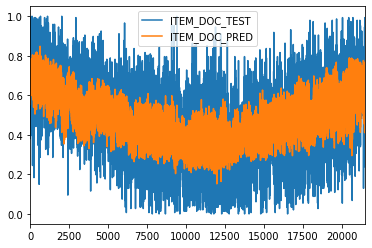

In [32]:
result.plot()